In [1]:
import numpy
from scipy import ndimage
from skimage import io, feature, color
from skimage.filters import roberts, sobel, scharr, prewitt
import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
from matplotlib.dates import date2num, DateFormatter
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
# import the sd-data overlay module
import os

In [2]:
utDtCnv = 6 # hours
pltImgTimeList = [ datetime.datetime(2016,7,25, 5, 51, 48), \
                  datetime.datetime(2016,7,25, 5, 55, 50),\
                  datetime.datetime(2016,7,25, 6, 0, 51),\
                  datetime.datetime(2016,7,25, 6, 3, 51),\
                  datetime.datetime(2016,7,25, 6, 7, 20),\
                 datetime.datetime(2016,7,25, 6, 9, 41) ]

In [3]:
steveImgDir = "/home/bharat/Documents/steve-imgs/"
imgFileDict = {}
utDateList = []
for root, dirs, files in os.walk(steveImgDir):
    for fName in files:
        if ".jpg" not in fName:
            continue
        flDtSrc = fName.split(".jpg")[0]
        flDtList = [ int(x) for x in flDtSrc.split("-")[1:] ]
        currHour = flDtList[3]/10000
        currMin = (flDtList[3] - currHour*10000)/100
        currSec = flDtList[3] - currHour*10000 - currMin*100
        currDtObj =datetime.datetime( flDtList[0],\
                            flDtList[1], flDtList[2], currHour,\
                            currMin, currSec)
        currUtTime = currDtObj + datetime.timedelta(hours=utDtCnv)
        utDateList.append( currUtTime )
        imgFileDict[currUtTime] = root + "/" + fName

In [4]:
# img = io.imread( imgFileDict[imgFileDict.keys()[10]] )
# plt.imshow(img)

In [5]:
# fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=2, ncols=3,\
#                           sharex=True, sharey=True)
# for nim, imTm in enumerate(pltImgTimeList):
#     img = io.imread( imgFileDict[imTm] )
#     print axArr.shape
#     axArr[nim].imshow(img)
#     axArr[nim].axis('off')
#     title = imTm.strftime("%H%M%S")
#     axArr[nim].set_title( title )

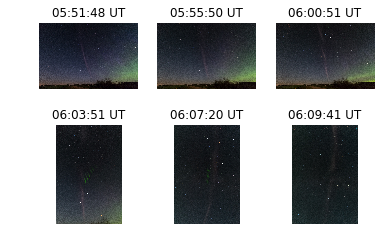

In [6]:
for imTm in range(1, 7):
    plt.subplot(2, 3, imTm)
    img = io.imread( imgFileDict[pltImgTimeList[imTm-1]] )
    plt.imshow(img)
    plt.axis('off')
    plt.title( pltImgTimeList[imTm-1].strftime("%H:%M:%S" + " UT" ) )
plt.savefig("../plots/steve-imgs.pdf")